In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# Make inline plots in this notebook, make them reasonable sizes, and with legible font size
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 8]

# Winston Cones
A Winston Cone, also known as a "parabolic concentrator", is a special non-imaging cone that accepts rays within fixed solid angle that hit its entrance aperture, and funnels them out the exit aperture into 2pi steradians.

We start with half of a parabola, written as r(theta) from the focus, with theta=0 being along the axis of symmetry of the parabola, towards the "sky".

Below is a figure from http://www.ericweisstein.com/research/thesis/node99.html
whose coordinates and formulas we'll follow.

![WinstonCone](WinstonCone.gif)

In [86]:
# define the cone

theta_deg = 15 # half angle of acceptance cone.
theta_rad = theta_deg*(np.pi/180.)

a = 115 #mm entrance aperture
a_prime = a*np.sin(theta_rad)

f = a_prime*(1+np.sin(theta_rad))
L = (a+a_prime)/np.tan(theta_rad)

print('Entrance:  half angle = {0:4.1f} deg, radius = {1:4.1f} mm'.format(theta_deg,a))
print('Exit radius: {0:4.1f} mm'.format(a_prime))
print('Length: {0:4.1f} mm'.format(L))
print('f: {0:4.1f} mm'.format(f))

Entrance:  half angle = 15.0 deg, radius = 115.0 mm
Exit radius: 29.8 mm
Length: 540.3 mm
f: 37.5 mm


(-26.960713215790914,
 566.1749775316091,
 -148.57351104575756,
 148.57351104575756)

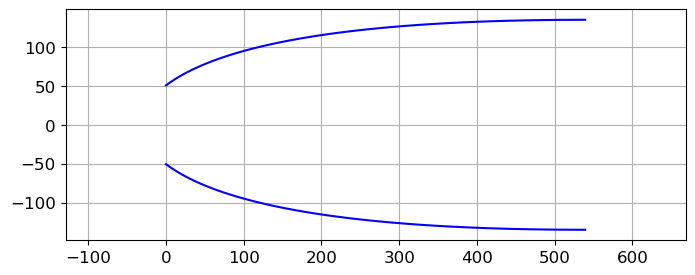

In [87]:
# build the cone in a straighforward way, by sweeping in phi.

phi_deg = np.arange(2*theta_deg,theta_deg+90,1)
phi = phi_deg*np.pi/180.
rho = 2*f/(1-np.cos(phi))
y2 = rho*np.cos(phi)+f
x2 = rho*np.sin(phi)
cost = np.cos(theta_rad)
sint = np.sin(theta_rad)

xp2 = x2*cost - y2*sint
yp2 = x2*sint + y2*cost

plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [8, 3]
plt.plot(yp2-yp2[-1],xp2,'b')
plt.plot(yp2-yp2[-1],-xp2,'b')
plt.grid()
plt.axis('equal')

# Uniform z spacing

For machining or 3D printing, we may want to generate the surface such that the points in our arrays have uniform spacing along the cone.  The method above generates points that are uniform in phi, so not very uniform along the cone.

We have:

$$ z = \rho cos(\phi - \theta) $$

and

$$ \rho = \frac{2f}{1- cos(\phi)} $$

From these we find

$$z = \frac{2f}{1- cos(\phi)} cos(\phi -\theta) .$$

I'd like to solve for $\phi(z)$, but that looks hard.  So, we'll use numpy to find phi for a given z, by minimizing the quantity

$$A = \left(z - \left( \frac{2f}{1- cos(\phi)} cos(\phi -\theta)\right)\right)^2 $$


Steps:
- Create a vector with the desired z values
- minimize the quantity "A" above for each z, which gives us the $\phi$ corresponding to that z.
- use that phi to find rho.






In [96]:
# import the library that has the minimizer in it.
import scipy.optimize as sciopt

# Define the function we're going to minimize.
def myfunc(phi,z,theta,f):
    # The first argument is the variable that will be used to minimize the function.  The next three 
    # are (fixed, during the minimization) extra parameters of the function.
    A = z - ( (2*f*np.cos(phi-theta))/(1- np.cos(phi)))
    return(A**2)

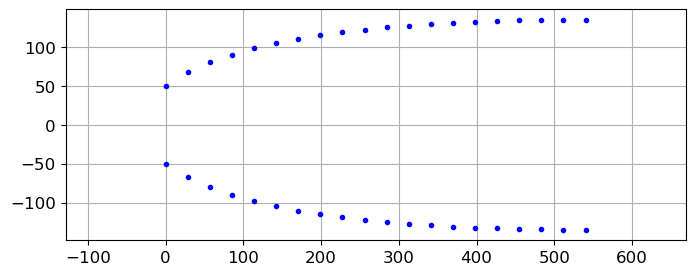

In [98]:
# Set up the spacing we want in z.  We're going to do it coarsely here, for illustration in the plot.
z_vec = np.linspace(0,L,20)
phi0_guess = np.pi/4         # the minimizer requires a first guess at phi
phi_vec = np.array([])

# loop through our z vector, finding and storing the value of phi corresponding to each z.
for z in z_vec:
    res=sciopt.minimize(myfunc,phi0_guess,(z,theta_rad,f))
    phi_vec = np.append(phi_vec,res.x[0])

# Now find rho for each of those phis (or z's)
rho_vec = 2*f/(1-np.cos(phi_vec))

# conver to the plotting coordinates
y2 = rho_vec*np.cos(phi_vec)+f
x2 = rho_vec*np.sin(phi_vec)
cost = np.cos(theta_rad)
sint = np.sin(theta_rad)

# rotate to primed coordinate system
xp2 = x2*cost - y2*sint
yp2 = x2*sint + y2*cost

# Plot
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [8, 3]
plt.plot(yp2-yp2[0],xp2,'b.')
plt.plot(yp2-yp2[0],-xp2,'b.')

plt.axis('equal')
plt.grid()


In [99]:
# Just for educational purposes, here's the full structure the minimizer returned.
res

      fun: 1.691070506597958e-10
 hess_inv: array([[1.07062428e-07]])
      jac: array([0.01338611])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 52
      nit: 5
     njev: 20
   status: 2
  success: False
        x: array([0.52359877])

In [101]:
res.x[0]

0.5235987695808534